Akurasi: 0.688
Confusion Matrix:
 [[79 20]
 [28 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.80      0.77        99
           1       0.57      0.49      0.53        55

    accuracy                           0.69       154
   macro avg       0.66      0.64      0.65       154
weighted avg       0.68      0.69      0.68       154



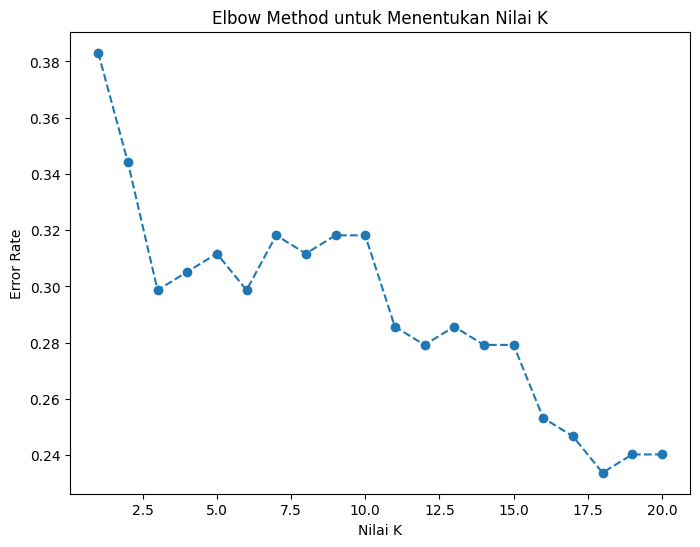

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

df: pd.DataFrame = pd.read_csv(
  filepath_or_buffer="data/diabetes.csv",
  float_precision="high",
  sep=","
)

X: pd.DataFrame = df.drop("Outcome", axis=1)
Y: pd.Series = df["Outcome"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)

Y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

print(f"Akurasi: {round(accuracy, 3)}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

error_rates = []
for k in range(1, 21):
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, Y_train)
    y_temp_pred = knn_temp.predict(X_test)
    error_rates.append(1 - accuracy_score(Y_test, y_temp_pred))

# Plot hasil error rate untuk setiap K
plt.figure(figsize=(8, 6))
plt.plot(range(1, 21), error_rates, marker='o', linestyle='--')
plt.title('Elbow Method untuk Menentukan Nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Error Rate')
plt.show()